# Assignment: Linear and Logistic Regression

## 1. Business understanding

Real estate pricing is a critical factor for homebuyers, sellers, investors, and real estate agencies. Accurately predicting house prices can help stakeholders make informed decisions regarding property valuation, investment strategies, and market trends. The goal of this project is to develop predictive models for estimating real estate prices based on available features in the dataset.

In this assignment we construct two models:

- Linear Regression model: Predicts the continuous target variable to estimate real estate prices.
- Logistic Regression mode: Converts the target variable into a binary classification and predicts whether a house price falls into the higher or lower category.

#### Goals
- Identify most influential factors to real estate prices.
- Develop model that can accurately predict house prices.
- Compare the effectiveness of linear and logistic regression for this problem.

#### Our objectives
- to learn to use linear regression for predicting continuously varying target variables
- to learn to use logistic regression for binary classification
- to learn to estimate the relative importance of input features

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# Split data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=25)

# Extract useful data from X data sets
X_train = X_train[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

X_test = X_test[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]

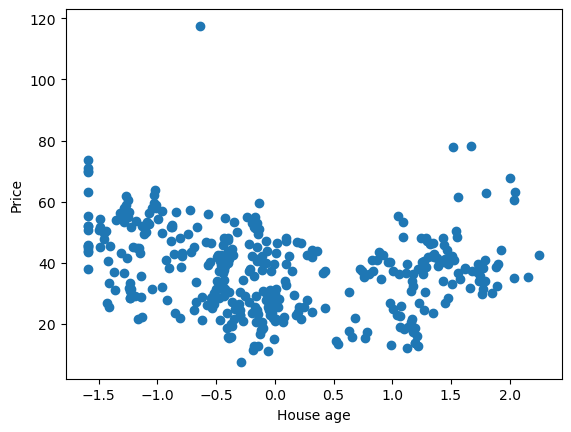

In [65]:

# Scaling train and test data sets
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
scaled_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Ensure X_train and y_train have the same number of rows
if len(scaled_train) == len(y_train):
    plt.scatter(scaled_train['X2 house age'], y_train)
    plt.xlabel('House age')
    plt.ylabel('Price')
    plt.show()
else:
    print("Error: data sets do not have the same number of rows.")

In [66]:
from sklearn.linear_model import LinearRegression

# Fitting LinearRegression model with data sets
model = LinearRegression()
model.fit(scaled_train, y_train)
b0 = model.intercept_
b1 = model.coef_[0]
print(b0, b1)

[37.83359375] [-2.78302242 -6.60846146  3.93677932]


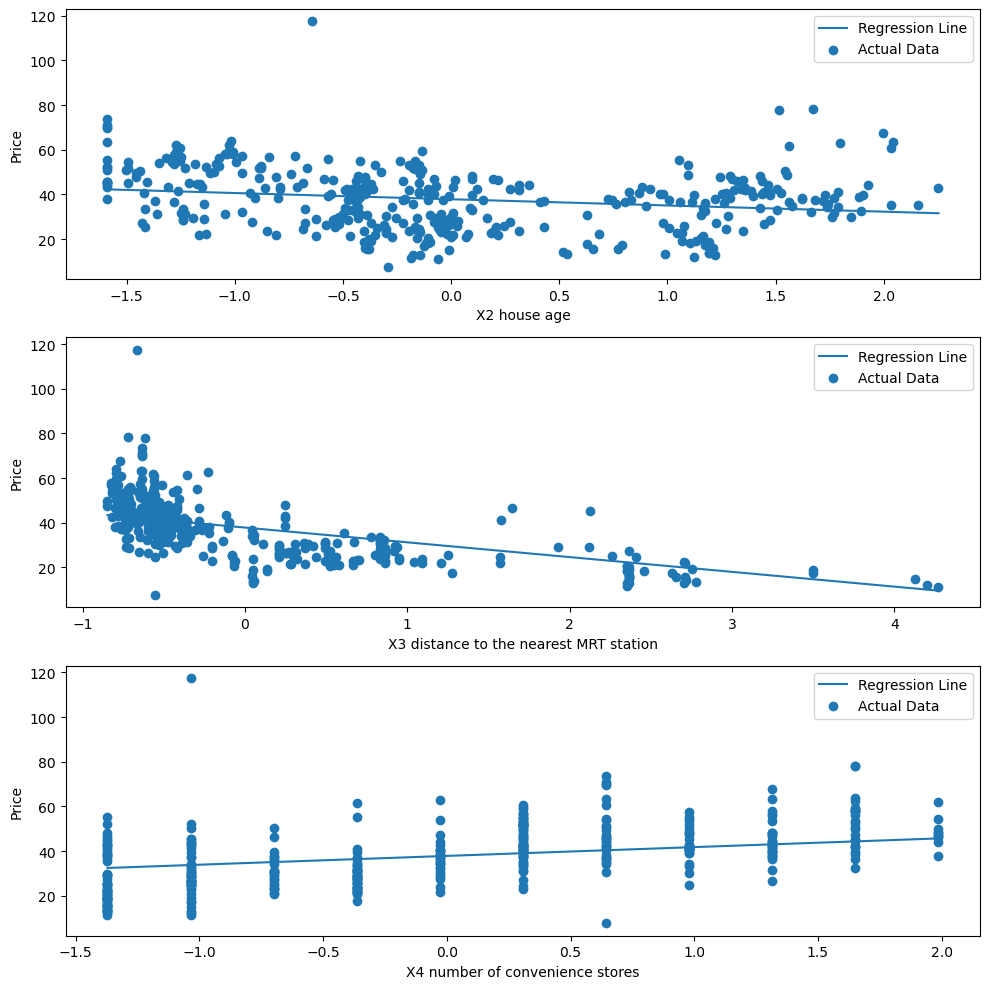

In [67]:
import numpy as np

# List of features to plot
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']

# Create subplots
fig, axs = plt.subplots(len(features), 1, figsize=(10, 10))

# Loop through each feature and plot
for i, feature in enumerate(features):
    xs = np.linspace(scaled_train[feature].min(), scaled_train[feature].max(), len(scaled_train))
    ys = b0 + b1[i] * xs

    axs[i].plot(xs, ys, label='Regression Line')
    axs[i].scatter(scaled_train[feature], y_train, label='Actual Data')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')
    axs[i].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(scaled_train)

print("Mean absolute error: %.2f" % mean_absolute_error(y_train, preds))

Mean absolute error: 6.61


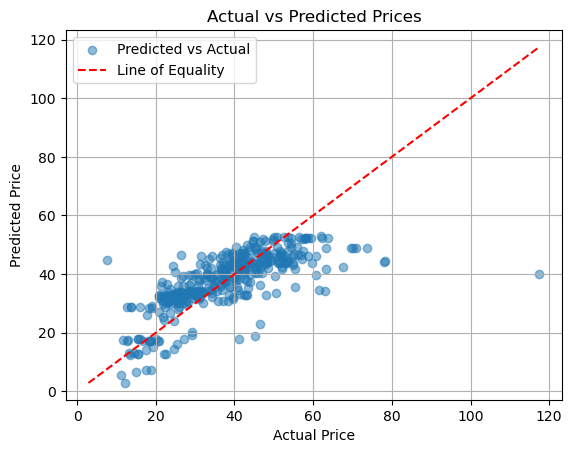

In [70]:
# Convert y_train and preds dataset to numpy array
y_train_np = np.array(y_train).astype(float)
preds_np = np.array(preds).astype(float)

# Scatter plot of actual vs predicted prices
plt.scatter(y_train_np, preds_np, alpha=0.5, label='Predicted vs Actual')

# Plot the line of equality
max_val = max(max(y_train_np), max(preds_np))
min_val = min(min(y_train_np), min(preds_np))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Line of Equality')

# Labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()